In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# SELECIONAR A PASTA "Colab Notebooks" DO DRIVE COMO DIRETÓRIO
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


# **PYTHON: ÂNGULOS DE CORREÇÃO DE ASTIGMATISMO**

## **Curva de $\theta_1$ e $\theta_2$ que compensam o astigmatismo para diferentes raios de curvatura dos espelhos**

Encontra os valores de $\theta_1$ e $\theta_2$ que satisfazem a equação de compensação de astigmatismo abaixo:

$$
 \dfrac{\sin{\theta_1}^2}{\cos{\theta_1}} + \dfrac{\sin{\theta_2}^2}{\cos{\theta_2}} = \dfrac{2l(n^2-1)}{R} \dfrac{\sqrt{n^2+1}}{n^4}
$$

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


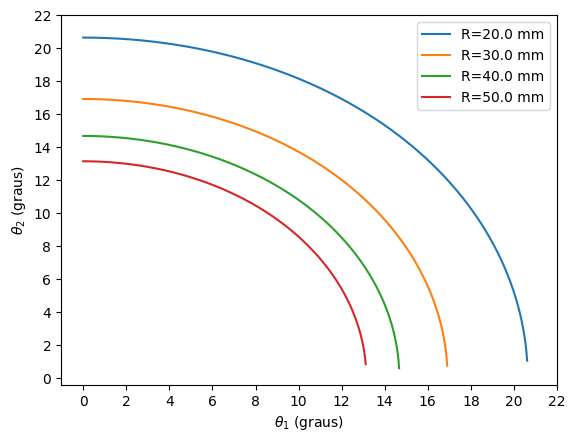

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

# Define os parâmetros
l = 3.0     # Comprimento do meio Kerr
n = 1.760   # Índice de refração linear

# Define a função a ser resolvida
def eq(theta1, theta2):
    return np.sin(theta1)**2/np.cos(theta1) + np.sin(theta2)**2/np.cos(theta2) - 2*l*(n**2 - 1)/R*np.sqrt(n**2 + 1)/n**4

theta_vals = np.linspace(0, math.pi/5, 1000)

r_values = np.linspace(20, 50, 4)  # Raio do espelho esférico (mm)
theta1_vals = [[] for i in range(len(r_values))]  # Lista de listas para armazenar valores de theta1 para cada r
theta2_vals = [[] for i in range(len(r_values))]  # Lista de listas para armazenar valores de theta1 para cada r
theta1_vals_deg = [[] for i in range(len(r_values))]  # Lista de listas para armazenar valores de theta1 em graus para cada r
theta2_vals_deg = [[] for i in range(len(r_values))]  # Lista de listas para armazenar valores de theta1 em graus para cada r

fig, ax = plt.subplots()
for i, R in enumerate(r_values):
    for theta1 in theta_vals:
        sol = fsolve(eq, 0.01, args=(theta1,))
        # Verifique se a solução é positiva e não nula
        if sol > 0.01:
            theta1_vals[i].append(theta1)
            theta2_vals[i].append(sol)
        else:
            # Preencha com NaN se a solução não for encontrada
            theta1_vals_deg[i].append(np.nan)
            theta2_vals_deg[i].append(np.nan)
    # Converta as listas em arrays
    theta1_vals[i] = np.array(theta1_vals[i])
    theta2_vals[i] = np.array(theta2_vals[i])

    # Converta radianos para graus para o gráfico
    theta1_vals_deg[i] = np.degrees(theta1_vals[i])
    theta2_vals_deg[i] = np.degrees(theta2_vals[i])
    ax.plot(theta1_vals_deg[i], theta2_vals_deg[i], label=f"R={R} mm")

    # Crie um arquivo .txt e escreva o cabeçalho
    filename = f'valores_R_{R}.txt'
    with open(filename, 'w') as f:
        # Formate os dados corretamente
        for theta1, theta2 in zip(theta1_vals_deg[i], theta2_vals_deg[i]):
          f.write(f'{theta1}\t{theta2[0]}\n')


# Configurar os rótulos dos eixos e a legenda
ax.set_xlabel(r'$\theta_1$ (graus)')
ax.set_ylabel(r'$\theta_2$ (graus)')

# Configurar o fundo da legenda como transparente
legend = ax.legend()
frame = legend.get_frame()
frame.set_facecolor('none')

# Configurar marcas de incremento nos eixos x e y
plt.xticks(np.arange(0, 23, step=2))
plt.yticks(np.arange(0, 23, step=2))

# Salvar o gráfico em formato PNG com fundo transparente
plt.savefig('astigmatism_angles.png', transparent=True, dpi=300)

# Mostrar o gráfico
plt.show()

## **Curva de $\theta_1$ e $\theta_2$ que compensam o astigmatismo para R = 30 mm**

Encontra os valores de $\theta_1$ e $\theta_2$ que satisfazem a equação de compensação de astigmatismo abaixo, considerando $R = 30 mm$:

$$
 \dfrac{\sin{\theta_1}^2}{\cos{\theta_1}} + \dfrac{\sin{\theta_2}^2}{\cos{\theta_2}} = \dfrac{2l(n^2-1)}{R} \dfrac{\sqrt{n^2+1}}{n^4}
$$

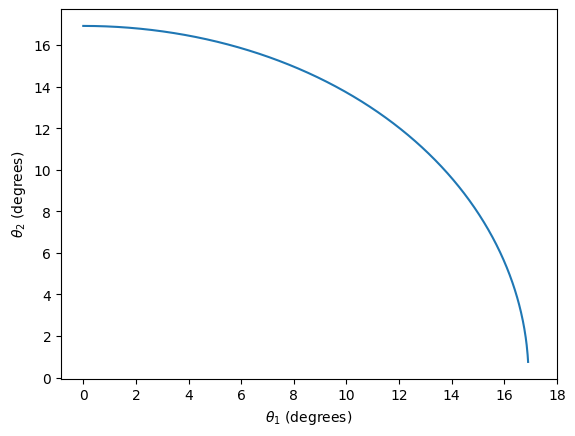

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

# Define the parameters
l = 3.0     # kerr medium length
n = 1.760   # linear refractive index
R = 30.0    # spherical mirror radius

# Define the function to solve
def eq(theta1, theta2):
    return np.sin(theta1)**2/np.cos(theta1) + np.sin(theta2)**2/np.cos(theta2) - 2*l*(n**2 - 1)/R*np.sqrt(n**2 + 1)/n**4

# Convert degrees to radians
theta_vals = np.linspace(0, math.pi/10, 1000)

# Loop over each theta1 value and find the corresponding theta2 values
theta1_vals = []
theta2_vals = []
for theta1 in theta_vals:
    sol = fsolve(eq, 0.01, args=(theta1,))
    # Check if the solution is positive and non-zero
    if sol > 0.01:
        theta1_vals.append(theta1)
        theta2_vals.append(sol)
    else:
        break

# Convert the lists to arrays
theta1_vals = np.array(theta1_vals)
theta2_vals = np.array(theta2_vals)

# Convert radians to degrees for plotting
theta1_vals_deg = np.degrees(theta1_vals)
theta2_vals_deg = np.degrees(theta2_vals)

# Plot the results
plt.plot(theta1_vals_deg, theta2_vals_deg)
plt.xlabel(r'$\theta_1$ (degrees)')
plt.ylabel(r'$\theta_2$ (degrees)')
#plt.title(r'Positive values of $\theta_2$ for angles $\theta_1$')
plt.xticks(np.arange(0, 19, step=2))  # set x-axis labels to 2-degree increments
plt.show()

## **Cálculo de $2\theta$ que compensa o astigmatismo para R = 30 mm**

Encontra os valores de $2\theta$ que satisfaz a equação de compensação de astigmatismo abaixo, para $R = 30 mm$:

$$
 \sin{\theta}\tan{\theta} = \dfrac{2l(n^2-1)}{R} \dfrac{\sqrt{n^2+1}}{n^4}
$$

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

# Define the parameters
l = 3.0     # kerr medium length
n = 1.760   # linear refractive index
R = 30.0    # spherical mirror radius

# Define the function to solve
def eq(theta):
    return np.sin(theta)**2/np.cos(theta) + np.sin(theta)**2/np.cos(theta) - 2*l*(n**2 - 1)/R*np.sqrt(n**2 + 1)/n**4

sol = 2*np.degrees(fsolve(eq, 0.01))
print(f"The 2\u03b8 astigmatism compensated angle is: {sol[0]:.1f}°")

The 2θ astigmatism compensated angle is: 24.0°


# **Cálculo de conversão de $\lambda$ para $f_{rep}$ e estimativa de largura temporal do pulso limitado a transformada de Fourier**

In [ ]:
d_lambda = 12e-9      # Bandwidth in m
lambda_0 = 1550e-9     # Center Wavelength m
c = 2.99792e8         # Speed of Light in m/s
d_freq = c * d_lambda/(lambda_0**2)   # Bandwidth in Hz
print(f"d_freq: {d_freq*2e-12:.1f} THz")  # Print the Bandwitdh in THz
tau = 0.441/d_freq    # Pulse Duration in s
print(f"tau: {tau*1e15:.1f} fs")  # Print the Pulse Duration in fs

d_freq: 3.0 THz
tau: 294.5 fs


# **CÓDIGO PERDIDO**

-1.2069977426636553 [0.0, 2.639778218910547, 5.603350616446356, 9.55012657802056]


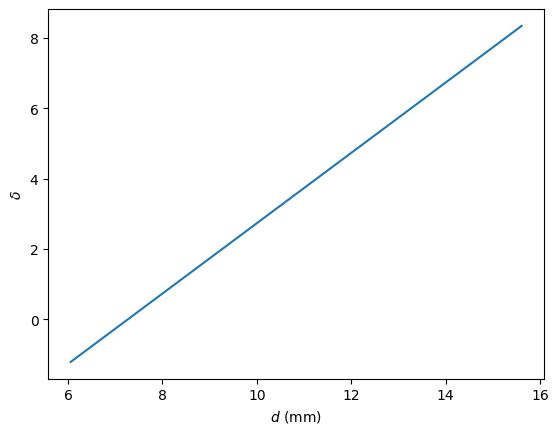

2.639778218910547 2.963572397535809 5.603350616446356
6.280221781089453 5.956427602464191 3.316649383553644


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nc = 1.772 # linear refractive index
l = 3.0 # crystal length (mm)

L1 = 67.37
L2 = 79.76 + 104.06
R = 30.0
f1 = R/2
f2 = R/2
shift = (14.5+15.6)-f1-f2-l*(1-1/nc)
d = []
d.append(0.0)
d.append(f2**2/(L2-f2)+l*(1-1/nc))
d.append(f1**2/(L1-f1)+l*(1-1/nc))
d.append(d[1]+d[2]+l*(1-1/nc))
print(shift, d)

shift_values = np.linspace(shift, shift+d[3], 100)  # spherical mirror radius (cm)
d_values = []
for s in shift_values:
  d_values.append(-s+f1+f2-15.6)
d_values.reverse()

# Plot the results
plt.plot(d_values, shift_values)
plt.xlabel(r'$d$ (mm)')
plt.ylabel(r'$\delta$')
#plt.title(r'Positive values of $\theta_2$ for angles $\theta_1$')
#plt.xticks(np.arange(0, 19, step=2))  # set x-axis labels to 2-degree increments
plt.show()

print(d[1],d[2]-d[1],d[2])
print(8.92-d[1],8.92-(d[2]-d[1]),8.92-d[2])

# **CURVAS DE ESTABILIDADE E CINTURA DO FEIXE INTRACAVIDADE** (rascunhos)

**DEFINIÇÃO DE PARÂMETROS**

In [ ]:
# d = d1+d2
# d3 = caminho pelos espelhos planos
# d1 - cristal (centro) - d2
# rep = c/(d+d3) -> d3 = c/rep - d

R = 3 # spherical mirror radius (cm)
nc = 1.772 # linear refractive index
c = 3e10 # speed of light (cm/s)
l = 0.3 # crystal length (cm)
wavelength = 780e-7 # wavelenth (cm)

# Matrices (Spherical mirrors, free space, cristal, ar-cristal, cristal-ar)
M = ((1,L/2),(0,1)) * ((1,0),(0,1/nc)) * ((1, d/2-l/2),(0,1)) * ((1,0),(-2/R,1)) * ((1,c/rep-d),(0,1)) * ((1,0),(-2/R,1)) * ((1,d/2-l/2),(0,1)) * ((1,0),(0,nc)) * ((1,l/2),(0,1))


**CÁLCULOS DE ESTABILIDADE**

A cavidade apresenta estabilidade quando a matriz ABCD satisfaz: $-2 \leq A+D \leq 2$.

Definindo $A+D$ como uma função das distâncias e do *free spectral range* do laser, *i.e.* $\text{est}(d_1,d_2,FRS) \equiv A+D,$ tem-se que a condição de estabilidade é:

$$
    -2 \leq \text{est}(d_1,d_2,FRS) \leq 2
$$

In [ ]:
# ESTABILIDADE DA CAVIDADE
  # Cavidade é estavel se -2 < A+D < 2
  est(R, rep, d) = M[[1,1]] + M[[2,2]]
  NSolve[est[3,1,d] == -2]
  # {{d -> 3.1307},{d -> 27.}}

IndentationError: unexpected indent (<ipython-input-2-b2b814a84d45>, line 3)

A partir de cálculos numéricos com esta condição, é possível obter os resultados:

In [ ]:
  # Gráfico de d (cm) por rep (GHz)
  # Limites: +/- de 0.1 a 1GHZ no eixo x e +/- 3.1 a 3.5cm no eixo y
  ImplicitPlot[{(est[3,a,b]^2==4), {a,0.1,1}, {b,1,10}}] # Calcula valores de d para rep de 0.1 a 1GHz

In [ ]:
(*Definição das constantes*)(*R=3;raio do espelho esférico (cm)*)
nc = 1.772; (*índice de refração linear*)
c = 3*^10; (*velocidade da luz (cm/s)*)
l = 0.3; (*comprimento do cristal (cm)*)
wavelength = 780*^-7; (*comprimento de onda (cm)*)

(*Definição das matrizes*)
M = FullSimplify[{{1, l/2}, {0, 1}} . {{1, 0}, {0, 1/nc}} . {{1,
      d/2 - l/2}, {0, 1}} . {{1, 0}, {-2/R, 1}} . {{1, c/rep - d}, {0,
       1}} . {{1, 0}, {-2/R, 1}} . {{1, d/2 - l/2}, {0, 1}} . {{1,
      0}, {0, nc}} . {{1, l/2}, {0, 1}}];

(*Estabilidade da cavidade*)
est[R_, rep_, d_] = M[[1, 1]] + M[[2, 2]];

(*Resolve a equação de estabilidade da cavidade para R=3cm e rep=1GHz*)
NSolve[est[R, rep, d] == 2 && R == 3 && rep == 1, {R, rep, d}]

(*Gráfico de d (cm) por rep (GHz)*)
(*Limites:+/-de 0.1 a 1GHZ no eixo x e+/-3.1 a 3.5cm no eixo y*)
ContourPlot[(est[3, a, b])^2 == 4 , {a, 0.1, 1}, {b, 1, 10},
 ContourStyle -> {{Thickness[0.01], RGBColor[1, 0, 0]}},
 FrameLabel -> {"Repetition Rate (GHz)",
   "d (cm)"}] (*Calcula valores de d para rep de 0.1 a 1GHz*)


In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Define constants and parameters
c = 3e10
l = 0.3
nc = 1.772
R = 3
rep = 5.0

# Define the function est
def est(R, rep, d, c, l, nc):
    numerator = 2 * (2 * c * (l - l * nc + nc * (d - R)) + (-2 * d * (l + d * nc - l * nc) + 2 * l * (-1 + nc) * R + nc * R**2) * rep)
    denominator = nc * R**2 * rep
    return numerator / denominator

# Define the equation function to find the root
def equation(d):
    return est(R, rep, d, c, l, nc) +2

# Function to find all numerical solutions with a difference greater than a threshold
def find_numerical_solutions(rep_values, threshold):
    all_solutions = []
    prev_solution = None

    root = fsolve(equation, 4.0)

    if prev_solution is None or abs(root[0] - prev_solution) > threshold:
        all_solutions.append(root[0])
        prev_solution = root[0]

    return all_solutions

# Generate values for rep
rep_values = np.linspace(0.1, 2, 100)

# Find numerical solutions with a difference greater than 0.05
numerical_solutions = find_numerical_solutions(rep_values, 0.05)

# Print all numerical solutions
print("Numerical solutions for est(R, rep, d, c, l, nc)^2 - 4 = 0 with a difference greater than 0.05:")
for i, solution in enumerate(numerical_solutions):
    print(f"d_{i+1} =", solution)


Numerical solutions for est(R, rep, d, c, l, nc)^2 - 4 = 0 with a difference greater than 0.05:
d_1 = 3.1306997742663656


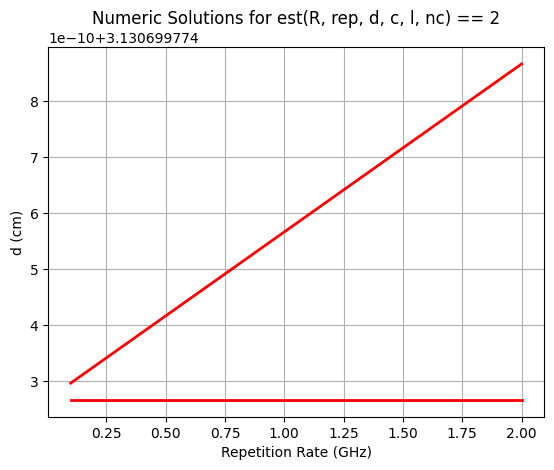

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define constants and parameters
c = 3e10
l = 0.3
nc = 1.772
R = 3

# Define the function est
def est(R, rep, d, c, l, nc):
    numerator = 2 * (2 * c * (l - l * nc + nc * (d - R)) + (-2 * d * (l + d * nc - l * nc) + 2 * l * (-1 + nc) * R + nc * R**2) * rep)
    denominator = nc * R**2 * rep
    return numerator / denominator

# Define the equation function to find the roots
def equation_low(d, rep):
    return est(R, rep, d, c, l, nc) + 2
def equation_up(d, rep):
    return est(R, rep, d, c, l, nc) - 2

# Generate values for rep
rep_vals = np.linspace(0.1, 2, 100)

# Arrays to store the numerical solutions for d
solutions_low = []
solutions_up = []

# Loop over each rep value and find the corresponding numerical solutions for d
for rep in rep_vals:
    # Use fsolve to find the root of the equation for the given rep value
    root_low = fsolve(equation_low, 3.8, args=(rep,))
    # Store the solution for d
    solutions_low.append(root_low[0])
    # Use fsolve to find the root of the equation for the given rep value
    root_up = fsolve(equation_up, 3.8, args=(rep,))
    # Store the solution for d
    solutions_up.append(root_up[0])

# Plot the numerical solutions as a curve
plt.plot(rep_vals, solutions_low, color='r', linewidth=2, label="line 1")
plt.plot(rep_vals, solutions_up, color='r', linewidth=2, label="line 2")
plt.xlabel("Repetition Rate (GHz)")
plt.ylabel("d (cm)")
plt.title("Numeric Solutions for est(R, rep, d, c, l, nc) == 2")
plt.grid(True)
#plt.ylim(3.1, 3.2)
plt.show()


![picture](https://drive.google.com/uc?id=1PJge15q6BNScYxMnH9sa5_2T31Ev_8Az)

In [ ]:
  # Gráfico com 4 curvas de d (cm) por R (cm)
  # Limites: de 1 a 10cm no eixo x e de +/- 1 a 10 no eixo y
  ImplicitPlot[{(est[a,0.1,b]^2==4), est[a,0.5,b]^2==4), est[a,1,b]^2==4), {a,1,10}, {b,1,10}}] # Calcula d para R de 1 a 10 (limitando y até 10)

![picture](https://drive.google.com/uc?id=1lwPUN4XrYSP2TniCca-Z0ipvajgheSNh)

In [ ]:
(*Definição das constantes*)
(*R=3; raio do espelho esférico (cm)*)
nc = 1.772; (*índice de refração linear*)
c = 3*^10; (*velocidade da luz (cm/s)*)
l = 0.3; (*comprimento do cristal (cm)*)
wavelength = 780*^-7; (*comprimento de onda (cm)*)

(*Definição das matrizes*)
M = FullSimplify[{{1, l/2}, {0, 1}} . {{1, 0}, {0, 1/nc}} . {{1,
      d/2 - l/2}, {0, 1}} . {{1, 0}, {-2/R, 1}} . {{1, c/rep - d}, {0,
       1}} . {{1, 0}, {-2/R, 1}} . {{1, d/2 - l/2}, {0, 1}} . {{1,
      0}, {0, nc}} . {{1, l/2}, {0, 1}}];

(*Estabilidade da cavidade*)
est[R_, rep_, d_] := M[[1, 1]] + M[[2, 2]];

(* Resolve a equação de estabilidade da cavidade para R = 3cm e rep = \
1GHz*)
NSolve[est[2, 1, d] == -2]

(*  Gráfico de d (cm) por rep (GHz) *)
(*  Limites:+/-de 0.1 a 1GHZ no eixo x e+/-3.1 a 3.5cm no eixo y *)
ContourPlot[(est[3, a, b]^2 == 4), {a, 0.1, 1}, {b, 1, 10},
  ContourStyle -> {{Thickness[0.01], RGBColor[1, 0, 0]}},
  FrameLabel -> {"Repetition Rate (GHz)", "d (cm)"}] (* Calcula valores de d para rep de 0.1 a 1GHz *)

(* Gráfico com 4 curvas de d (cm) por R (cm) *)
(*  Limites: de 1 a 10cm no eixo x e de +/- 1 a 10 no eixo y *)
ImplicitPlot[{(est[a,0.1,b]^2==4), est[a,0.5,b]^2==4), est[a,1,b]^2==4), {a,1,10}, {b,1,10}}] (* Calcula d para R de 1 a 10 (limitando y até 10) *)

**SPOT ENTRE OS ESPELHOS CURVOS**

A cintura do feixe $\omega$ do laser em um determinado plano $z_i$ é dada por:

$$
  \omega^2(z_i) = \dfrac{|B| \lambda}{\pi} \sqrt{\dfrac{1}{1 - (A+D)^2/4}}
$$

que pode ser escrita em função do raio dos espelhos esféricos $R$ e do *free spectral range* $FSR$:

$$
  \omega^2(R,FSR,z_i) = \dfrac{|B| \lambda}{\pi} \sqrt{\dfrac{1}{1 - \text{est}(R,FSR,z_i)^2/4}}
$$

In [ ]:
# SPOT ENTRE OS ESPELHOS CURVOS
  w(R, rep, d) = sqrt(wavelength/pi*sqrt(M[[1,2]]^2)/sqrt(1 - (est(R, rep, d)/2)^2))

A partir de cálculos numéricos com esta condição, é possível obter os resultados:

In [ ]:
# Gráfico de  w (um) por rep (GHz)
  Plot[{w[3,b,3.15]10^4}, {b,0.1,1}] # Calcula w para rep entre 0.1 e 1 fixando d = 3.15cm e R = 3cm

![picture](https://drive.google.com/uc?id=1n8nJwCbwOY0DsTMoGkhO9WT_RnQY1HYg)

In [ ]:
  # Gráfico de w (um) por d (cm) para 3 valores de rep
  a1 = 3
  k1 = 3
  k2 = 5
  Plot[ {w[a1,1,b]10^4, w[a1,0.5,b]10^4, w[a1,0.1,b]10^4}, {b, k1, k2}] # Calcula w para d entre k1 e k2 fixando R = 3cm e rep = 1, 0.5 e 0.1GHz

![picture](https://drive.google.com/uc?id=1h8kifbmZ455za3gjm5bRZQgqubKzPEWR)

# **PYTHON: CURVAS DE ESTABILIDADE E CINTURA DO FEIXE INTRACAVIDADE**

## **Cálculos de estabilidade**

Esse código Python visa encontrar o valor de $d$ que satisfaz a equação $\text{est}(R, \text{rep}, d) = -2$, onde:

- $\text{est}(R, \text{rep}, d)$ é uma função que retorna $A + D$ na matriz ABCD, onde $A$ e $D$ são elementos dessa matriz resultante da multiplicação de várias matrizes que representam diferentes estágios ópticos, como espelhos esféricos e espaços livres. Aqui, $R$ é o raio do espelho esférico, $\text{rep} $ é a taxa de repetição e $d$ é a distância entre os espelhos.

- A função `objective_function(d, R, rep)` calcula o valor da função objetivo, que é a diferença entre $\text{est}(R, \text{rep}, d)^2$ e $4$.

- `minimize_scalar` é usado para encontrar o mínimo da função objetivo em relação a $d$, dadas as constantes $R $ e $\text{rep}$.

- O valor de $d$ que satisfaz a condição é então impresso.

In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import numpy as np

# d = d1+d2
# d3 = free-space between the plane mirrors
# d1 - crystal (center) - d2
# rep = c/(d+d3) -> d3 = c/rep - d

def est(R, rep, d):
    nc = 1.760            # linear refractive index
    c = 30                # speed of light (cm Ghz)
    l = 0.3               # crystal length (cm)
    wavelength = 780e-7   # wavelenth (cm)

    # Matrices (Spherical mirrors, free space, cristal, air-crystal, crystal-air)
    M1 = np.array([[1, l/2], [0, 1]])         # free-space
    M2 = np.array([[1, 0], [0, 1/nc]])        # ?
    M3 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M4 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M5 = np.array([[1, c/rep-d], [0, 1]])     # free-space between the plane mirrors
    M6 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M7 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M8 = np.array([[1, 0], [0, nc]])          # ?
    M9 = np.array([[1, l/2], [0, 1]])         # free-space

    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9  # matrices multiplication
    return M[0, 0] + M[1, 1]                        # Return A+D in the ABCD Matrix

def objective_function(d, R, rep):
    return est(R, rep, d)**2 + 4  # return the absolute value of (A+B + 2 = 0)

R = 3.0     # spherical mirror radius (cm)
rep = 1.0   # repetition rate
result = minimize_scalar(objective_function, args=(R, rep))
d = result.x

print(f"The value of d that satisfies est[R,rep,d] == -2 with R={R:.1f}cm and rep={(rep):.1f}GHz is d={d:.4f}cm")

The value of d that satisfies est[R,rep,d] == -2 with R=3.0cm and rep=1.0GHz is d=3.3196cm


***O código abaixo não parece ser correto:***

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

# Function to calculate est(R, rep, d)
def est(R, rep, d):
    nc = 1.772            # linear refractive index
    c = 30                # speed of light (cm Ghz)
    l = 0.3               # crystal length (cm)
    wavelength = 780e-7   # wavelenth (cm)

    # Matrices (Spherical mirrors, free space, crystal, air-crystal, crystal-air)
    M1 = np.array([[1, l/2], [0, 1]])         # free-space
    M2 = np.array([[1, 0], [0, 1/nc]])        # ?
    M3 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M4 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M5 = np.array([[1, c/rep-d], [0, 1]])     # free-space between the plane mirrors
    M6 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M7 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M8 = np.array([[1, 0], [0, nc]])          # ?
    M9 = np.array([[1, l/2], [0, 1]])         # free-space

    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9  # matrices multiplication
    return M[0, 0] + M[1, 1]                        # Return A+D in the ABCD Matrix

# Objective function to find the root
def objective_function(d, R, rep):
    return est(R, rep, d)**2 - 4

R = 3.0     # spherical mirror radius (cm)
rep = 1.0   # repetition rate

# Find the first root using minimize_scalar
result = minimize_scalar(objective_function, args=(R, rep))
result2 = minimize_scalar(objective_function, bracket=(3.0, (result.x-0.2)), args=(R, rep))

# Calculate the second root by subtracting the first root from the total length d
d1 = result.x
d2 = result2.x
print(f"The two values of d that satisfy est[R,rep,d]^2 - 4 == 0 with R={R:.1f}cm and rep={rep:.1f}GHz are d1={d1:.4f}cm and d2={d2:.4f}cm")


The two values of d that satisfy est[R,rep,d]^2 - 4 == 0 with R=3.0cm and rep=1.0GHz are d1=3.3207cm and d2=3.3207cm


## **Curvas de cintura do feixe e distância entre os espelhos**

### **Gráfico da variação do spot e da distancia entre os espelhos curvos em relação a frep**

Este código Python calcula e traça duas curvas em um gráfico com relação à taxa de repetição (rep em GHz):

1. **Curva de d (cm)**: A função `objective_function` é usada para encontrar a distância d entre os espelhos esféricos para cada valor de rep que satisfaz a equação $\text{est}(R, \text{rep}, d)^2 + 4 = 0 $. Isso é feito iterando sobre uma gama de valores de rep e calculando d usando `minimize_scalar`.

2. **Curva de $w$ (μm)**: A função `w` calcula o tamanho do spot entre os espelhos esféricos (w) para cada valor de rep. Isso é feito usando a matriz ABCD e as fórmulas para calcular o tamanho do ponto a partir dos parâmetros da matriz ABCD.

Ambas as curvas são traçadas em um único gráfico, com o eixo x representando a taxa de repetição (rep em GHz). O eixo y à esquerda representa a distância d entre os espelhos esféricos (em cm), enquanto o eixo y à direita representa o tamanho do spot w entre os espelhos esféricos (em μm).

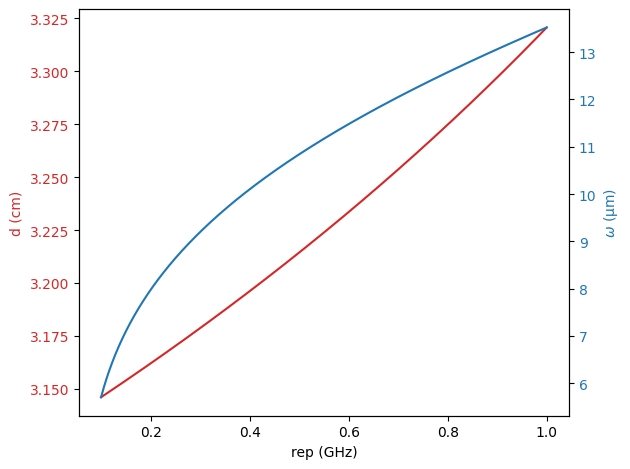

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

wavelength = 780e-7   # wavelength (cm)
R = 3.0               # spherical mirror radius (cm)
d = 3.15

def ABCD(R, rep, d):
    nc = 1.772            # linear refractive index
    c = 30                # speed of light (cm Ghz)
    l = 0.3               # crystal length (cm)

    # Matrices (Spherical mirrors, free space, crystal, air-crystal, crystal-air)
    M1 = np.array([[1, l/2], [0, 1]])         # free-space
    M2 = np.array([[1, 0], [0, 1/nc]])        # crystal
    M3 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M4 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M5 = np.array([[1, c/rep-d], [0, 1]])     # free-space between the plane mirrors
    M6 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M7 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M8 = np.array([[1, 0], [0, nc]])          # crystal
    M9 = np.array([[1, l/2], [0, 1]])         # free-space

    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9  # matrices multiplication
    return M  # Return the ABCD Matrix

def est(M):
    return M[0, 0] + M[1, 1]      # Return A+D in the ABCD Matrix

def objective_function(d, R, rep):
    M = ABCD(R, rep, d)  # Calculate the ABCD matrix using the given parameters
    return est(M)**2 + 4  # Return (A+B)² + 4

# spot size between the spherical mirrors
def w(R, rep, d):
    M = ABCD(R, rep, d)  # Calculate the ABCD matrix using the given parameters
    w0 = np.sqrt(wavelength/np.pi*np.sqrt(M[0, 1].item()**2)/np.sqrt(1 - (est(M)/2)**2))
    return w0

rep_values = np.linspace(0.1, 1, 1000)    # repetition rate (GHz)

# Calculate the d values for rep values
d_values = []
for rep in rep_values:
    result = minimize_scalar(objective_function, args=(R, rep))
    d_values.append(result.x)

# Calculate the w values for rep values
w_values = [w(R, rep, d)*1e4 for rep in rep_values]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('rep (GHz)')
ax1.set_ylabel('d (cm)', color=color)
ax1.plot(rep_values, d_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('w (μm)',color=color) # label and color of y-axis
ax2.plot(rep_values, w_values, color=color) # plot the second curve
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.show() # show the plot

### **Gráfico da distância entre os espelhos curvos em relação ao raio dos mesmos**

Este código Python calcula e traça curvas de $d$ em função do raio do espelho esférico $R$ para diferentes taxas de repetição ($\text{rep}$).

O código consiste nas seguintes partes:

1. **Função de Objetivo (`objective_function`)**:
   - Calcula o valor de $d$ para uma determinada taxa de repetição $( \text{rep} $) e raio do espelho esférico ($R$).
   - Usa a função `minimize_scalar` do `scipy.optimize` para minimizar a função objetivo $\text{est}(R, \text{rep}, d)^2 + 4$ em relação a $d$.
   
2. **Loop para Calcular os Valores de $d$**:
   - Itera sobre os valores de $R$ especificados no array `r_values`.
   - Para cada valor de $R$, encontra o valor correspondente de $d$ para cada taxa de repetição em `rep_values`.
   - Armazena os valores de $d$ calculados em uma lista de listas `d_values`, onde cada lista interna corresponde a uma taxa de repetição diferente.

3. **Plotagem**:
   - Usa a biblioteca `matplotlib.pyplot` para traçar as curvas de $d$ em função de $R$ para cada taxa de repetição.
   - Configura os rótulos dos eixos, a legenda e os limites do eixo y.

Este código é útil para visualizar como a distância $d$ entre os espelhos esféricos varia com o raio do espelho esférico $R$ para diferentes taxas de repetição ($\text{rep}$).

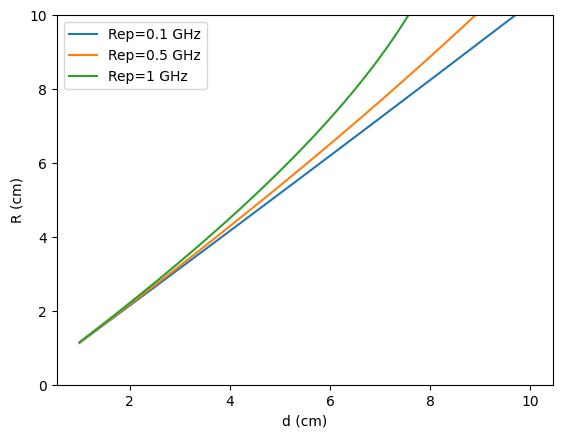

In [ ]:
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import numpy as np

# d = d1+d2
# d3 = free-space between the plane mirrors
# d1 - crystal (center) - d2
# rep = c/(d+d3) -> d3 = c/rep - d

def est(R, rep, d):
    nc = 1.772            # linear refractive index
    c = 30                # speed of light (cm Ghz)
    l = 0.3               # crystal length (cm)
    wavelength = 780e-7   # wavelenth (cm)

    # Matrices (Spherical mirrors, free space, cristal, air-crystal, crystal-air)
    M1 = np.array([[1, l/2], [0, 1]])         # free-space
    M2 = np.array([[1, 0], [0, 1/nc]])        # ?
    M3 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M4 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M5 = np.array([[1, c/rep-d], [0, 1]])     # free-space between the plane mirrors
    M6 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M7 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M8 = np.array([[1, 0], [0, nc]])          # ?
    M9 = np.array([[1, l/2], [0, 1]])         # free-space

    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9  # matrices multiplication
    return M[0, 0] + M[1, 1]                        # Return A+D in the ABCD Matrix

def objective_function(d, R, rep):
    return est(R, rep, d)**2 + 4  # return (A+B)² = 4

rep_values = [0.1, 0.5, 1]          # repetition rate (GHz)
r_values = np.linspace(1, 10, 1000)  # spherical mirror radius (cm)
d_values = [[] for i in range(len(rep_values))]  # list of lists to store d values for each rep

fig, ax = plt.subplots()

for i, rep in enumerate(rep_values):
    for R in r_values:
        result = minimize_scalar(objective_function, args=(R, rep))
        d_values[i].append(result.x)
    ax.plot(r_values, d_values[i], label=f"Rep={rep} GHz")

ax.set_xlabel("d (cm)")
ax.set_ylabel("R (cm)")
ax.legend()
ax.set_ylim([0, 10])
plt.show()

### **Tamanho do spot em função da distância entre os espelhos curvos (diferentes curvas para diferentes frep)**

Este código Python calcula e traça curvas de tamanho do spot ($w$) em função da distância $d$ entre os espelhos esféricos para diferentes taxas de repetição $( \text{rep} $).

O código consiste nas seguintes partes:

1. **Função de Objetivo (`objective_function`)**:
   - Calcula o valor de $w $ para uma determinada distância $d$, raio do espelho esférico $R$ e taxa de repetição ($\text{rep}$).
   - Usa a função `ABCD` para calcular a matriz ABCD correspondente usando os parâmetros fornecidos.
   - Calcula o tamanho do spot $w$ usando a expressão fornecida.
   
2. **Loop para Calcular os Valores de $w$**:
   - Itera sobre os valores de $d$ especificados no array `d_values`.
   - Para cada valor de $d$, encontra o valor correspondente de $w$ para cada taxa de repetição em `rep_values`.
   - Armazena os valores de $w$ calculados em uma lista de listas `w_values`, onde cada lista interna corresponde a uma taxa de repetição diferente.

3. **Plotagem**:
   - Usa a biblioteca `matplotlib.pyplot` para traçar as curvas de $w$ em função de $d$ para cada taxa de repetição.
   - Configura os rótulos dos eixos, a legenda e a unidade do eixo y para micrômetros ($\mu m $).

Este código é útil para visualizar como o tamanho do spot $w$ varia com a distância $d$ entre os espelhos esféricos para diferentes taxas de repetição ($ \text{rep}$).

<ipython-input-6-93d25a61d12b>:37: RuntimeWarning: invalid value encountered in sqrt
  w0 = np.sqrt(wavelength/np.pi*np.sqrt(M[0, 1].item()**2)/np.sqrt(1 - (est(M)/2)**2))


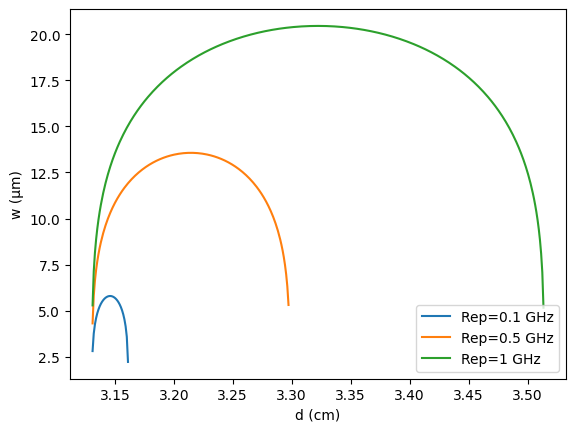

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

wavelength = 780e-7   # wavelength (cm)
R = 3.0               # spherical mirror radius (cm)

def ABCD(R, rep, d):
    nc = 1.772            # linear refractive index
    c = 30                # speed of light (cm Ghz)
    l = 0.3               # crystal length (cm)

    # Matrices (Spherical mirrors, free space, crystal, air-crystal, crystal-air)
    M1 = np.array([[1, l/2], [0, 1]])         # free-space
    M2 = np.array([[1, 0], [0, 1/nc]])        # crystal
    M3 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M4 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M5 = np.array([[1, c/rep-d], [0, 1]])     # free-space between the plane mirrors
    M6 = np.array([[1, 0], [-2/R, 1]])        # spherical mirror
    M7 = np.array([[1, d/2-l/2], [0, 1]])     # free-space
    M8 = np.array([[1, 0], [0, nc]])          # crystal
    M9 = np.array([[1, l/2], [0, 1]])         # free-space

    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9  # matrices multiplication
    return M  # Return the ABCD Matrix

def est(M):
    return M[0, 0] + M[1, 1]      # Return A+D in the ABCD Matrix

def objective_function(d, R, rep):
    M = ABCD(R, rep, d)  # Calculate the ABCD matrix using the given parameters
    return est(M)**2 + 4  # Return (A+B)² + 4

# spot size between the spherical mirrors
def w(R, rep, d):
    M = ABCD(R, rep, d)  # Calculate the ABCD matrix using the given parameters
    w0 = np.sqrt(wavelength/np.pi*np.sqrt(M[0, 1].item()**2)/np.sqrt(1 - (est(M)/2)**2))
    return w0

fig, ax = plt.subplots()

rep_values = [0.1, 0.5, 1]          # repetition rate (GHz)
d_values = np.linspace(3, 4, 1000)    # repetition rate (GHz)
w_values = [[] for _ in rep_values]

for i, rep in enumerate(rep_values):
    for d in d_values:
        w_values[i].append(w(R, rep, d)*1e4)  # Calculate the w values for d values
    ax.plot(d_values, w_values[i], label=f"Rep={rep} GHz")

ax.set_xlabel("d (cm)")
ax.set_ylabel("w (µm)")
ax.legend()
plt.show()

# **CÁLCULOS DE KERR LENS SENSITIVITY** (rascunhos)

**DEFINIÇÃO DE PARÂMETROS**

```
# CÁLCULO DO KERR LENS SENSITIVITY

    #   ->        R(  x    //     y  )R
    #         d3                         d5
    #   Rc |              d4                  | ->
```

In [ ]:
# Estabilidade, waist, kerr
n2 = 775e-6   # nonlinear refractive index of crystal (mm^2/W)
d3 = 90       # distance between M2 e P1 (mm)
d4 = 90       # distance between P1 e OC (mm)
d5 = 90       # distance between M1 e OC (mm)
lc = 3        #  crystal length (mm)
R = 30        # spherical mirrors radius
Rc = 10000  # Plane mirror (mm)
# k = 0 -> sem lente | k = 1 -> com lente
# e = 0 -> Rc = espelho plano | e = 1 -> Rc = espelho convexo

$$ FSR = \dfrac{c}{d} = \dfrac{3\cdot 10^8}{d_1+d_2+d_3+d_4+d_5} $$

In [ ]:
# Define frep (repetition rate) = speed of light / cavity total length
frep[x,y] = 3e11/(d3+d4+d5+x+y)

NameError: name 'd3' is not defined

$$
    P_p = \frac{1}{2} \cdot \dfrac{1.2}{f} \cdot \dfrac{2}{\sqrt{\pi}} \, Erf[1/f]
$$

In [ ]:
# Define Pp (potência intracavidade??)
Pp[x,y] = ((0.5*1.2)/frep[x,y])*2/(sqrt(pi)*1e-12*Erf[1/(frep[x,y]*1e-12)])  # ??????????


**DEFINIÇÃO DE FUNÇÕES**

In [ ]:
M = FullSimplify[
    {{1,lc/(2nc)}, {0,1}}.{{1,y-lc/2},{0,1}}.{{1,0},{-2/R, 1}}.{{1,d5},{0,1}}.{{1,0},{-2e/Rc,1}}.{{1,d3+d4},{0,1}}.{{1,0},{-2/R,1}}.{{1,x-lc/2},{0,1}}.{{1,lc/(2nc)},{0,1}}.{{0,1},{-k*(4*n2*P*lc/(pi*wo^4)),1}},
    {x>0,y>0,n>0}] # matriz do sistema

estv[w1,x1,y1,e1,k1] =
    Simplify[M[[1,1]]+M[[2,2]]/.{x->x1, y->y1, k->k1, e->e1, wo->w1, P->Pp[x1,y1]}] # estabilidade

wv[P, w1, x1, y1, e1, k1] =
    ((wavelength/pi)^2 * M[[1,2]]^2/(1- ((M[[1,1]]-M[[2,2]])/2)) )^(1/4) /. {x->x1, y->y1, k->k1, e->e1, wo->w1, P->P1} # beam waist

kerr[c,y,e] :=
    Limit[1/wv[P, wn[x,y,e], x,y,e,1] D[wv[P, wn[x,y,e], x,y,e,1], P], P->0]//N # kerr lens sensitivity

In [ ]:
import numpy as np
import sympy as sp

# Estabilidade, waist, kerr
n2 = 775e-6   # nonlinear refractive index of crystal (mm^2/W)
d3 = 90       # distance between M2 e P1 (mm)
d4 = 90       # distance between P1 e OC (mm)
d5 = 90       # distance between M1 e OC (mm)
lc = 3        #  crystal length (mm)
R = 30        # spherical mirrors radius
Rc = 10000  # Plane mirror (mm)
# k = 0 -> sem lente | k = 1 -> com lente
# e = 0 -> Rc = espelho plano | e = 1 -> Rc = espelho convexo

def frep(x,y):
    return 3e11/(d3+d4+d5+x+y)

def Pp(x,y):
    return ((0.5*1.2)/frep(x,y))*2/(np.sqrt(np.i)*1e-12*Erf[1/(frep(x,y)*1e-12)])


def ABCD(R, rep, d, lc, nc, Rc, e, k, n2, P, wo):
    # Define constants
    c = 30                # speed of light (cm GHz)
    l = 0.3               # crystal length (cm)
    pi = np.pi            # Pi

    # Define the matrices
    M1 = np.array([[1, lc/(2*nc)], [0, 1]])                                    # free-space
    M2 = np.array([[1, 0], [0, 1]])                                             # free-space
    M3 = np.array([[1, 0], [-2/R, 1]])                                           # spherical mirror
    M4 = np.array([[1, d], [0, 1]])                                              # free-space
    M5 = np.array([[1, 0], [-2*e/Rc, 1]])                                        # spherical mirror
    M6 = np.array([[1, d], [0, 1]])                                              # free-space
    M7 = np.array([[1, 0], [-2/R, 1]])                                           # spherical mirror
    M8 = np.array([[1, lc/(2*nc)], [0, 1]])                                      # free-space
    M9 = np.array([[0, 1], [-k*(4*n2*P*lc/(pi*wo**4)), 1]])                       # free-space

    # Perform the matrices multiplication
    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9

    return M  # Return the ABCD Matrix

def estv(w1, x1, y1, e1, k1):

    # Define symbols
    x, y, e, k, wo, Pp = sp.symbols('x y e k wo Pp')

    # Define the ABCD matrix M (replace with your actual matrix)
    M = ABCD(R, rep(x1,y1), (d3+d4+d5+x+y), lc, nc, Rc, e, k, n2, P, wo)
    # Compute stability
    stability = sp.simplify((M[0,0] + M[1,1]).subs({x: x1, y: y1, k: k1, e: e1, wo: w1, P: Pp}))

    return stability


def wv(P, w1, x1, y1, e1, k1):

    # Define the ABCD matrix M (replace with your actual matrix)
    M = ABCD(R, rep, d, lc, nc, Rc, e, k, n2, P, wo)

    # Compute beam waist
    x, y, e, k, wo, P1 = sp.symbols('x y e k wo P1')
    beam_waist = ((wavelength/pi)**2 * M[0,1]**2/(1- ((M[0,0]-M[1,1])/2)) )**(1/4)
    beam_waist = beam_waist.subs({x: x1, y: y1, k: k1, e: e1, wo: w1, P: P1})

    return beam_waist

def kerr(c, y, e):
    # Define symbols
    x, y, e, P = sp.symbols('x y e P')

    # Compute kerr lens sensitivity
    kerr_sensitivity = sp.limit(1/wv(P, wn(x, y, e), x, y, e, 1) * sp.diff(wv(P, wn(x, y, e), x, y, e, 1), P), P, 0)

    return kerr_sensitivity.evalf()  # Evaluate the expression numerically

NSolve[estv[wn[x,x,0], x, x, 0, 0]^2==4, x]
NSolve[estv[wn[x,x,1], x, x, 0, 1]^2==4, x]

# **PARÂMETRO KERR EM PYTHON**

In [67]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Stability, waist, kerr
nc = 1.772   # Refractive index of crystal
n2 = 775e-6   # Nonlinear refractive index of crystal (mm^2/W)
d3 = 90       # Distance between M2 and P1 (mm)
d4 = 90       # Distance between P1 and OC (mm)
d5 = 90       # Distance between M1 and OC (mm)
lc = 3        # Crystal length (mm)
R = 30        # Spherical mirrors radius
Rc = 1000    # Plane mirror (mm)

# Define constants
pi = np.pi  # Pi

def frep(x, y):
    return 3e11 / (d3 + d4 + d5 + x + y)

def Pp(x, y):
    return ((0.5 * 1.2) / frep(x, y)) * 2 / (sp.sqrt(pi) * 1e-12 * sp.erf(1 / (frep(x, y) * 1e-12)))

def Mn(x, y, e):
    # Define the matrices
    M1 = np.array([[1, lc / (2 * nc)], [0, 1]])                               # Free-space
    M2 = np.array([[1, y - lc / 2], [0, 1]])                                    # Free-space
    M3 = np.array([[1, 0], [-2 / R, 1]])                                        # Spherical mirror
    M4 = np.array([[1, d5], [0, 1]])                                            # Free-space
    M5 = np.array([[1, 0], [-2 * e / Rc, 1]])                                   # Spherical mirror
    M6 = np.array([[1, d3 + d4], [0, 1]])                                       # Free-space
    M7 = np.array([[1, 0], [-2 / R, 1]])                                        # Spherical mirror
    M8 = np.array([[1, x - lc / 2], [0, 1]])                                    # Free-space
    M9 = np.array([[1, lc / (2 * nc)], [0, 1]])                                 # Free-space

    # Perform the matrices multiplication
    Mn = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9

    return Mn  # Return the ABCD Matrix

def estn(x1, y1, e1):
    # Define the ABCD matrix M
    ABCD = Mn(x1, y1, e1)
    # Compute stability
    stability = sp.simplify(ABCD[0, 0] + ABCD[1, 1])
    # Return the stability
    return stability

def wn(x1, y1, e1):
    # Define the ABCD matrix M
    ABCD = Mn(x1, y1, e1)
    # Compute beam waist
    beam_waist = ((1 / np.pi) ** 2 * ABCD[0, 1] ** 2 / (1 - ((ABCD[0, 0] - ABCD[1, 1]) / 2))) ** (1 / 4)
    # Return the beam waist
    return beam_waist

def M(P, w0, x, y, e, k):
    # Define the matrices
    M1 = np.array([[1, lc / (2 * nc)], [0, 1]])                                                                   # Free-space
    M2 = np.array([[1, y - lc / 2], [0, 1]])                                                                      # Free-space
    M3 = np.array([[1, 0], [-2 / R, 1]])                                                                          # Spherical mirror
    M4 = np.array([[1, d5], [0, 1]])                                                                              # Free-space
    M5 = np.array([[1, 0], [-2 * e / Rc, 1]])                                                                     # Spherical mirror
    M6 = np.array([[1, d3 + d4], [0, 1]])                                                                         # Free-space
    M7 = np.array([[1, 0], [-2 / R, 1]])                                                                          # Spherical mirror
    M8 = np.array([[1, x - lc / 2], [0, 1]])                                                                      # Free-space
    M9 = np.array([[1, lc / (2 * nc)], [0, 1]])                                                                   # Free-space
    M10 = np.array([[0, 1], [-k * (4 * n2 * P * lc / (pi * w0 ** 4)), 1]])                                       # Kerr-lens

    # Perform the matrices multiplication
    M = M1 @ M2 @ M3 @ M4 @ M5 @ M6 @ M7 @ M8 @ M9 @ M10

    return M  # Return the ABCD Matrix

def estv(w1, x1, y1, e1, k1):
    # Define the ABCD matrix M
    ABCD = M(Pp(x1, y1), w1, x1, y1, e1, k1)
    # Compute stability
    stability = sp.simplify(ABCD[0, 0] + ABCD[1, 1])
    # Return the stability
    return stability

def wv(P1, w1, x1, y1, e1, k1):
    # Define the ABCD matrix M
    ABCD = M(P1, w1, x1, y1, e1, k1)
    # Compute beam waist
    beam_waist = ((1 / np.pi) ** 2 * ABCD[0, 1] ** 2 / (1 - ((ABCD[0, 0] - ABCD[1, 1]) / 2))) ** (1 / 4)
    # Return the beam waist
    return beam_waist

def kerr(x, y, e):
    # Compute kerr lens sensitivity
    kerr_sensitivity = sp.limit(1 / wv(Pp(x,y), wn(x, y, e), x, y, e, 1) * sp.diff(wv(Pp(x,y), wn(x, y, e), x, y, e, 1), Pp(x,y)), Pp(x,y), 0)
    return kerr_sensitivity.evalf()  # Evaluate the expression numerically

**Evaluation of the stability functions**

In [ ]:
# Define symbolic variable x
x = sp.symbols('x')

# Define the function to be plotted
func1 = estv(wn(x, x, 0), x, x, 0, 0) ** 2 - 4   # e = 0, k = 0
func2 = estv(wn(x, x, 0), x, x, 0, 1) ** 2 - 4   # e = 0, k = 1
func3 = estv(wn(x, x, 1), x, x, 1, 1) ** 2 - 4   # e = 1, k = 1
func4 = estv(wn(x, x, 1), x, x, 1, 0) ** 2 - 4   # e = 1, k = 0

# Create an array of x values for plotting
x_values = np.linspace(10, 22, 200)

# Evaluate the function for each x value
y1_values = [func1.subs(x, val).evalf() for val in x_values]
y2_values = [func2.subs(x, val).evalf() for val in x_values]
y3_values = [func3.subs(x, val).evalf() for val in x_values]
y4_values = [func3.subs(x, val).evalf() for val in x_values]

# Solve estv^2 == 4 for x, with e=0 k=1
solution1 = sp.nsolve(estv(wn(x, x, 0), x, x, 0, 1)**2 - 4, x, 10)  # first solution
solution2 = sp.nsolve(estv(wn(x, x, 0), x, x, 0, 1)**2 - 4, x, 20)  # second solution

# Plot the function
plt.plot(x_values, y1_values, color='red')
plt.plot(x_values, y2_values, color='green', linestyle='--')
plt.plot(x_values, y3_values, color='blue')
plt.plot(x_values, y4_values, color='orange', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title('Plot of the Function estv^2 - 4')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Add horizontal line at y=0
plt.axvline(x=solution1, color='k', linestyle='--')  # Add horizontal line at y=0
plt.axvline(x=solution2, color='k', linestyle='--')  # Add horizontal line at y=0
ax = plt.gca()
#ax.set_ylim([-10, 10000])  # note: log scale doesn't work with negative and positive values at the same time
ax.set_yscale('log')
plt.show()

# Print the solutions
print("Solution 1:", solution1)
print("Solution 2:", solution2)

**Plotar a curva de nível do parâmetro kerr**

In [ ]:
# Define the variables for the plot
min_val = 10    # Minimum limit of the plot
max_val = 30    # Maximum limit of the plot
precision = 500 # Precision of the plot

# Define a grid of x and y values
x_values = np.linspace(min_val, max_val, precision)
y_values = np.linspace(min_val, max_val, precision)

# Create a meshgrid from x and y values
X, Y = np.meshgrid(x_values, y_values)

# Create empty lists to store contour plots
contour_plots = []

# Loop through different values of e
for e in range(2):
    # Compute the kerr lens sensitivity for the current value of e
    kerr_sensitivity = kerr(X, Y, e)

    # Create a contour plot for the kerr lens sensitivity
    contour_plot = plt.contour(X, Y, kerr_sensitivity * 1e6)  # Multiply by 1e6 to scale the values

    # Append the contour plot to the list
    contour_plots.append(contour_plot)

# Show the contour plots
plt.show()


**CURVA DE NÍVEL KERR LENS SENSITIVITY PARA D1 E D2**

In [ ]:
# Encontra os valores de d1 (na curva d1=d2) em que kerr=0
NSolve[estv[wn[x,x,0], x, x, 0, 0]^2==4, x]
NSolve[estv[wn[x,x,1], x, x, 0, 1]^2==4, x]
# {{x -> 15.6535},{x -> 17.5285}}
min = 14      # define o limite min do gráfico
max = 19      # define o limite máx do gráfico
prec = 500    # define a precisão do gráfico

Timing[
        Do[
            {
              a[1,e] = ContourPlot[kerr[x,y,e]1e6, {x,min,max},{y,min,max}], # curva de nível do parâmetro kerr para valores de d1 e d2
              a[2,e] = ContourPlot[kerr[x,y,e]1e6, {x,min,max},{y,min,max}, Contours->{0}], # contorna onde kerr = 0
              a[3,e] = ContourPlot[estv[wn[x,y,e], e,y,e,1], {x,min,max},{y,min,max}, Contours->{-2,2}], # borda da região de estabilidade
              a[4,e] = ContourPlot[x-y, {x,min,max},{y,min,max}, Contours->{0}] # curva em que d1 = d2
            },{e,0,1}
          ]
]
Do[Show[a[1,i],a[2,i],a[3,i],a[4,i]],{i,0,1}]

![picture](https://drive.google.com/uc?id=1PGQsKxVs4RSkcdIxc_VPqPiG0GwS3AGe)


**KERR LENS SENSITIVITY PARA D1 = D2 = D/2**

In [ ]:
Plot[
        {kerr[2,x,x,0]1e6, kerr[1,x,x,0]1e6, kerr[0.76,x,x,0]1e6}, {x,15,22} # Plota a curva para d/2 entre 15 e 22 mm com frep = 2, 1, 0.76GHz
    ]

![picture](https://drive.google.com/uc?id=1ldOTGXKD59RMEEDOPBn75Mcnfk4XUH9j)

# **COMPILADO**

***Não parece estar correto, confiar no arquivo .nb do Mathematica***

In [ ]:
# d = d1+d2
# d3 = caminho pelos espelhos planos
# d1 - cristal (centro) - d2
# rep = c/(d+d3) -> d3 = c/rep - d

R = 3 # spherical mirror radius (cm)
nc = 1.772 # linear refractive index
c = 3e10 # speed of light (cm/s)
l = 0.3 # crystal length (cm)
wavelength = 780e-7 # wavelenth (cm)

# Matrices (Spherical mirrors, free space, cristal, ar-cristal, cristal-ar)
M = ((1,L/2),(0,1)) * ((1,0),(0,1/nc)) * ((1, d/2-l/2),(0,1)) * ((1,0),(-2/R,1)) * ((1,c/rep-d),(0,1)) * ((1,0),(-2/R,1)) * ((1,d/2-l/2),(0,1)) * ((1,0),(0,nc)) * ((1,l/2),(0,1))

# ESTABILIDADE DA CAVIDADE
  # Cavidade é estavel se -2 < a+d < 2
  est(R, rep, d) = M[[1,1]] + M[[2,2]]
  NSolve[est[3,1,d] == -2]
  # {{d -> 3.1307},{d -> 27.}}

  # Gráfico de d (cm) por rep (GHz)
  # Limites: +/- de 0.1 a 1GHZ no eixo x e +/- 3.1 a 3.5cm no eixo y
  ImplicitPlot[{(est[3,a,b]^2==4), {a,0.1,1}, {b,1,10}}] # Calcula valores de d para rep de 0.1 a 1GHz

  # Gráfico com 4 curvas de d (cm) por R (cm)
  # Limites: de 1 a 10cm no eixo x e de +/- 1 a 10 no eixo y
  ImplicitPlot[{(est[a,0.1,b]^2==4), est[a,0.5,b]^2==4), est[a,1,b]^2==4), {a,1,10}, {b,1,10}}] # Calcula d para R de 1 a 10 (limitando y até 10)

# SPOT ENTRE OS ESPELHOS CURVOS
  w(R, rep, d) = sqrt(wavelength/pi*sqrt(M[[1,2]]^2)/sqrt(1 - (est(R, rep, d)/2)^2))

  # Gráfico de  w (um) por rep (GHz)
  Plot[{w[3,b,3.15]10^4}, {b,0.1,1}] # Calcula w para rep entre 0.1 e 1 fixando d = 3.15cm e R = 3cm

  # Gráfico de w (um) por d (cm) para 3 valores de rep
  a1 = 3
  k1 = 3
  k2 = 5
  Plot[ {w[a1,1,b]10^4, w[a1,0.5,b]10^4, w[a1,0.1,b]10^4}, {b, k1, k2}] # Calcula w para d entre k1 e k2 fixando R = 3cm e rep = 1, 0.5 e 0.1GHz

# CÁLCULO DO KERR LENS SENSITIVITY

    #   ->        R(  x    //     y  )R
    #         d3                         d5
    #   Rc |              d4                  | ->

    n2 = 775e-6   # nonlinear refractive index of crystal (mm^2/W)
    d3 = 90       # distance between M2 e P1 (mm)
    d4 = 90       # distance between P1 e OC (mm)
    d5 = 90       # distance between M1 e OC (mm)
    lc = 3        #  crystal length (mm)
    R = 30        # spherical mirrors radius

    # Define frep (repetition rate) = speed of light / cavity total length
    frep[x,y] = 3e11/(d3+d4+d5+x+y)

    # Define Pp (potência intracavidade??)
    Pp[x,y] = ((0.5*1.2)/frep[x,y])*2/(sqrt(pi)*1e-12*Erf[1/(frep[x,y]*1e-12)])  # ??????????

    # Estabilidade, waist, kerr
      Rc = 10000  # Plane mirror (mm)
      # k = 0 -> sem lente | k = 1 -> com lente
      # e = 0 -> Rc = espelho plano | e = 1 -> Rc = espelho convexo

      M = FullSimplify[
          {{1,lc/(2nc)}, {0,1}}.{{1,y-lc/2},{0,1}}.{{1,0},{-2/R, 1}}.{{1,d5},{0,1}}.{{1,0},{-2e/Rc,1}}.{{1,d3+d4},{0,1}}.{{1,0},{-2/R,1}}.{{1,x-lc/2},{0,1}}.{{1,lc/(2nc)},{0,1}}.{{0,1},{-k*(4*n2*P*lc/(pi*wo^4)),1}},
          {x>0,y>0,n>0}] # matriz do sistema

      estv[w1,x1,y1,e1,k1] =
          Simplify[M[[1,1]]+M[[2,2]]/.{x->x1, y->y1, k->k1, e->e1, wo->w1, P->Pp[x1,y1]}] # estabilidade

      wv[P, w1, x1, y1, e1, k1] =
          ((wavelength/pi)^2 * M[[1,2]]^2/(1- ((M[[1,1]]-M[[2,2]])/2)) )^(1/4) /. {x->x1, y->y1, k->k1, e->e1, wo->w1, P->P1} # beam waist

      kerr[c,y,e] :=
          Limit[1/wv[P, wn[x,y,e], x,y,e,1] D[wv[P, wn[x,y,e], x,y,e,1], P], P->0]//N # kerr lens sensitivity

      # CURVA DE NÍVEL KERR LENS SENSITIVITY PARA D1 E D2
        # Encontra os valores de d1 (na curva d1=d2) em que kerr=0
        NSolve[estv[wn[x,x,0], x, x, 0, 0]^2==4, x]
        NSolve[estv[wn[x,x,1], x, x, 0, 1]^2==4, x]
        # {{x -> 15.6535},{x -> 17.5285}}
        min = 14      # define o limite min do gráfico
        max = 19      # define o limite máx do gráfico
        prec = 500    # define a precisão do gráfico

        Timing[
                Do[
                    {
                      a[1,e] = ContourPlot[kerr[x,y,e]1e6, {x,min,max},{y,min,max}], # curva de nível do parâmetro kerr para valores de d1 e d2
                      a[2,e] = ContourPlot[kerr[x,y,e]1e6, {x,min,max},{y,min,max}, Contours->{0}], # contorna onde kerr = 0
                      a[3,e] = ContourPlot[estv[wn[x,y,e], e,y,e,1], {x,min,max},{y,min,max}, Contours->{-2,2}], # borda da região de estabilidade
                      a[4,e] = ContourPlot[x-y, {x,min,max},{y,min,max}, Contours->{0}] # curva em que d1 = d2
                    },{e,0,1}
                  ]
        ]
        Do[Show[a[1,i],a[2,i],a[3,i],a[4,i]],{i,0,1}]

      # KERR LENS SENSITIVITY PARA D1 = D2 = D/2
        Plot[
            {kerr[2,x,x,0]1e6, kerr[1,x,x,0]1e6, kerr[0.76,x,x,0]1e6}, {x,15,22} # Plota a curva para d/2 entre 15 e 22 mm com frep = 2, 1, 0.76GHz
        ]

